In [76]:
#at least 33 global statistics
import warnings
warnings.filterwarnings("ignore")

In [77]:
import os
import pandas as pd
def  symbol_to_path(symbol,base_dir='/home/machine_learning/anaconda3/ml4trading/data/'):
    """returns  CSV  file path given symbol"""
    return os.path.join(base_dir,"{}.csv".format(str(symbol)))
def get_data(symbols,dates):
    """Reads stock  data( adjusted  close ) for  given symbols  from  csv  files   and returns  entire  df"""
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols :
        symbols.insert(0,'SPY')
    for symbol in symbols :
        #read and join data  for  each  symbol 
        df_temp=pd.read_csv(symbol_to_path(symbol),index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp,how='inner')
        if symbol == 'PSY':
            df = df.dropna(subset=["SPY"])
    return  df
def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe."""
    return df / df.ix[0,:]
def plot_data(df,title="Stock prices"):
    import  matplotlib
    from  matplotlib import pyplot as plt
    """ plot  stock prices"""
    %matplotlib inline
    ax=df.plot(title=title, fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
def plot_selected(df, columns,  start_index,end_index):
    subseted=df.ix[pd.date_range(start_index,end_index),columns].dropna()
    plot_data(subseted)
        

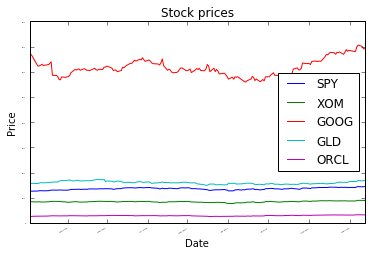

In [134]:
dates=pd.date_range('2012-01-01', '2013-12-31')
symbols=['SPY','XOM','GOOG','GLD','ORCL']
df=get_data(symbols,dates)
plot_data(df)

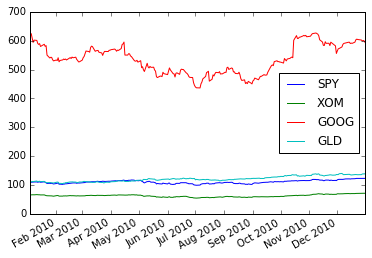

In [64]:
df.plot()

In [65]:
#mean of stock prices for each  symbol (column)
df.mean()

SPY     109.600119
XOM      61.526786
GOOG    535.623095
GLD     120.069762
dtype: float64

In [66]:
df.median()

SPY     108.840
XOM      61.465
GOOG    534.320
GLD     118.755
dtype: float64

In [67]:
df.std()

SPY      5.636382
XOM      4.114615
GOOG    50.460721
GLD      9.537110
dtype: float64

In [68]:
normalize_data(df).std()

SPY     0.046200
XOM     0.058696
GOOG    0.084955
GLD     0.068751
dtype: float64

In [69]:
#############################################rolling stuff############################################################

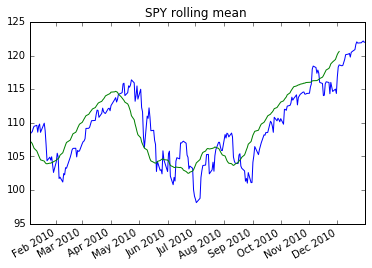

In [84]:
#plot SPY dat
ax=df['SPY'].plot(title='SPY rolling mean ',label="SPY")
rm_SPY.plot(label='ROLLING MEAN',ax=ax)

In [82]:
#COMPUTING rolling mean using 20 days average
rm_SPY=pd.rolling_mean(df['SPY'], window=20)

In [83]:
#add rolling mean to existing plot of  SPY
rm_SPY.plot(label='ROLLING MEAN',ax=ax)
 

In [85]:
################################Computing bollinger  bans ######################################################

In [86]:
def  get_rolling_mean( values,window):
    return pd.rolling_mean(values,window)

In [93]:
def get_rolling_std(values,window):
    return pd.rolling_std(values,window)

In [96]:
def get_bollinger_bands(rm,rstd):
    upper_band=rm+2*rstd
    lower_band=rm-2*rstd
    return upper_band,lower_band

In [135]:
rm_SPY=get_rolling_mean(df['ORCL'],window=20)
rstd_SPY=get_rolling_std(df['ORCL'],window=20)

In [136]:
upper_band,lower_band=get_bollinger_bands(rm_SPY,rstd_SPY)

In [137]:
####Ploting  raw SPY values,  rolling mean  and Bollinger Bands

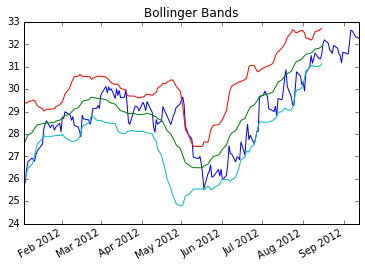

In [138]:
ax=df['ORCL'].plot(title='Bollinger Bands',label='SPY')
rm_SPY.plot(label='Rolling Mean',ax=ax)
upper_band.plot(label='Upper band',ax=ax)
lower_band.plot(label='Lower_band',ax=ax)

In [103]:
############################################Daily returns ##############################################################

In [105]:
import numpy as np
np.corrcoef(np.array(df))

array([[ 1.        ,  0.99998974,  0.99999287, ...,  0.9991144 ,
         0.99892671,  0.99893601],
       [ 0.99998974,  1.        ,  0.99999967, ...,  0.99929266,
         0.99912431,  0.99913234],
       [ 0.99999287,  0.99999967,  1.        , ...,  0.99926569,
         0.99909411,  0.9991025 ],
       ..., 
       [ 0.9991144 ,  0.99929266,  0.99926569, ...,  1.        ,
         0.99999086,  0.99999182],
       [ 0.99892671,  0.99912431,  0.99909411, ...,  0.99999086,
         1.        ,  0.99999982],
       [ 0.99893601,  0.99913234,  0.9991025 , ...,  0.99999182,
         0.99999982,  1.        ]])

In [113]:
def compute_daily_returns(df):
    daily_returns=df.copy()
    daily_returns=(df[1:]/df[:-1].values)-1
    daily_returns.ix[0,:]=0
    return daily_returns

In [117]:
returns=compute_daily_returns(df[['SPY','XOM']])
returns.head(3)

,SPY,XOM
2010-12-30,0.000000,0.000000
2010-12-29,0.001558,0.000142
2010-12-28,-0.000737,0.000569


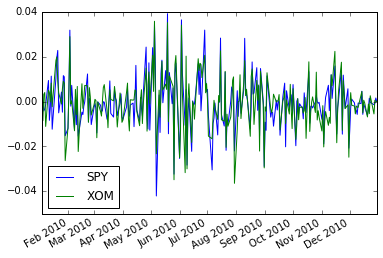

In [119]:
returns.plot()

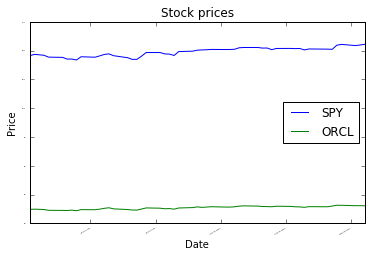

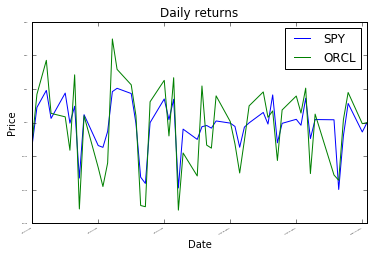

In [125]:
    dates = pd.date_range('2012-07-01', '2013-07-31')  # one month only
    symbols = ['SPY','ORCL']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns")


In [142]:
    symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
    start_date = "2005-12-31"
    end_date = "2014-12-07"
    dates = pd.date_range(start_date, end_date)  # date range as index
    df_data = get_data(symbol_list, dates)

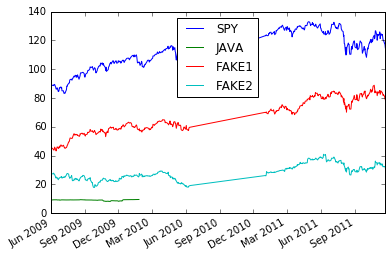

In [143]:
df_data.plot()

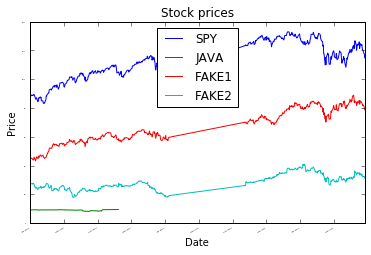

In [144]:
plot_data(df_data)

In [145]:
df_data.fillna(method="ffill",inplace=True)
df_data.fillna(method="bfill",inplace=True)

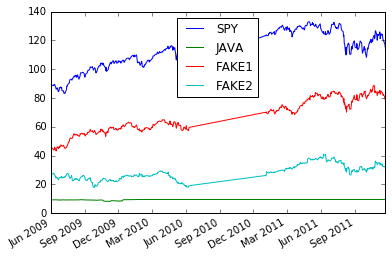

In [146]:
df_data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50d4eb3a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f50d4e9c320>]], dtype=object)

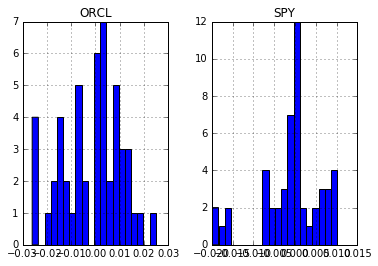

In [149]:
daily_returns.hist(bins=20)

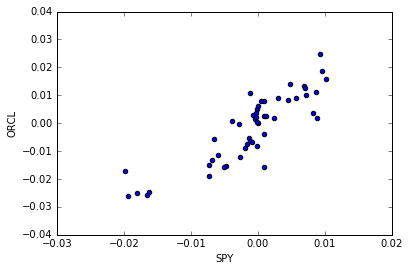

In [153]:
daily_returns.plot(kind='scatter',x='SPY',y='ORCL')

In [ ]:
#################################Sharpe ration #############################################################